# **DESAFÍO Nº3: VARIABLES ALEATORIAS I - TABAQUISMO Y GESTACIÓN**
### **Módulo 4: Análisis Estadístico con Python**
#### *Carrera Data Science - G-68 - Desafio Latam*
#### Estudiante: Felipe Leal Arancibia

En este desafío validaremos nuestros conocimientos sobre variables aleatorias. Para lograrlo, necesitarás aplicar lo visto en clases.

Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.

Tiempo asociado: 2 horas cronológicas

## Descripción

#### Un grupo de investigadores está interesado en analizar la relación entre el hábito de fumar con el crecimiento de los bebés en edad gestacional. Para esto han recopilado los datos guardados en el dataset baby.csv, que contiene los siguientes campos de datos:
##### - Birth.Weight : Peso del bebe
##### - Gestational.Days: Días de gestación
##### - Maternal.Age: Edad de la madre
##### - Maternal.Height: Altura de la madre
##### - Maternal.Pregnancy.Weight: Peso de la madre
##### - Maternal.Smoker: ¿Es la madre fumadora? (True: fumadora, False: no es fumadora)


#### A partir de estos datos se solicita:

In [1]:
# Primero importar todas las potenciales librería sa utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


#### 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes.

In [10]:
# Se importa base de datos
estudio_gestacional = pd.read_csv('baby.csv', delimiter=',')
estudio_gestacional

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1170,113,275,27,60,100,False
1170,1171,128,265,24,67,120,False
1171,1172,130,291,30,65,150,True
1172,1173,125,281,21,65,110,False


In [9]:
# Tipo de datos de las columnas
estudio_gestacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


### R. Hasta el momento, se ve que el dataset contiene 1.174 casos identificados en la columna "unnamed"; 5 variables numéricas (presumiblemente discretas, ya que no se ven ni decimales, ni números negativos ni otro elemento de los números reales que no sea entero); y 1 boleana, en cuyo caso, para efectos de la teoría de la probabilidad, se puede considerar como discreta (ya que asume dos valores que pueden asumir 0 y 1, falso y verdadero respectivamente). 



In [11]:
# Sondeo general de medidas de tendencia central y distribución
round(estudio_gestacional.describe(), 2)

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.00,1174.00,1174.00,1174.00,1174.00,1174.00
mean,587.50,119.46,279.10,27.23,64.05,128.48
std,339.05,18.33,16.01,5.82,2.53,20.73
min,1.00,55.00,148.00,15.00,53.00,87.00
25%,294.25,108.00,272.00,23.00,62.00,114.25
50%,587.50,120.00,280.00,26.00,64.00,125.00
75%,880.75,131.00,288.00,31.00,66.00,139.00
max,1174.00,176.00,353.00,45.00,72.00,250.00


-
-
-
___0___o___
-
-
-

#### 2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.

Text(0.5, 1.0, 'Distribución empírica del peso del bebé')

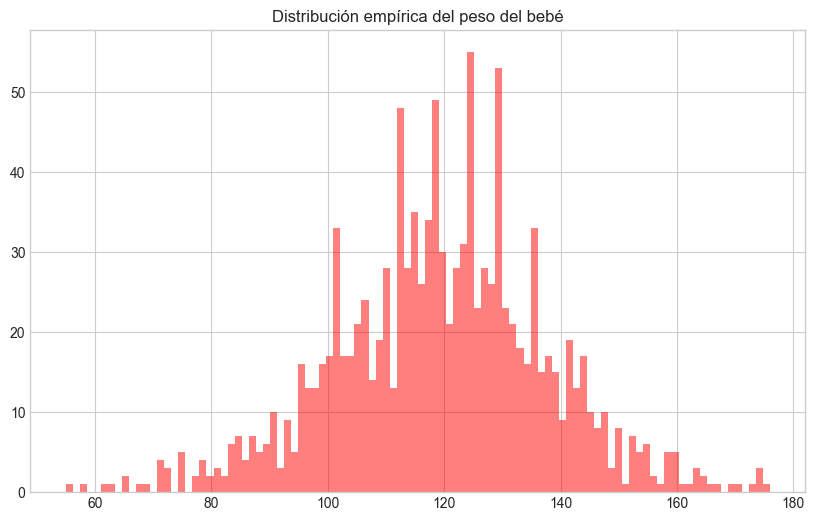

In [29]:
# Configuración de estilos de gráficos
plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.style.use('seaborn-v0_8-whitegrid')

plt.hist(estudio_gestacional['Birth.Weight'], bins=100, color='red', alpha=.5)
plt.title("Distribución empírica del peso del bebé")

-
-
-
___0___o___
-
-
-

#### 3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

-
-
-
___0___o___
-
-
-

#### 4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

-
-
-
___0___o___
-
-
-

#### 5. Considerando los datos dados:
##### ● Calcula la probabilidad de que una madre escogida al azar fume.
##### ● A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.
##### ● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales.
##### ● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.

#### Utilizando lo anterior:
##### ● compara gráficamente los resultados obtenidos anteriormente.
##### ● verifica el teorema del límite central, considerando las muestras de datos reales y las simuladas con el modelo binomial.
##### ● construye un modelo de distribución normal derivado del modelo binomial, y grafícalo junto a los anteriores para comparar. Concluye.



-
-
-
___0_FiN__o___
-
-
-

### Requerimientos

1. Conoce y aplica la distribución normal de datos, con sus respectivos parámetros. (3 puntos)

2. Relaciona las distribuciones reales de datos con modelos de distribución binomial y normal. (4 puntos)

3. Comprende y verifica la ley de los grandes números y el teorema del límite central. (3 puntos)